In [ ]:
!gdown https://drive.google.com/file/d/1_jHk-JpJmJ45LphG4af8G11oLbypDoTx/view?usp=sharing --fuzzy -O archive.zip

Downloading...
From (original): https://drive.google.com/uc?id=1_jHk-JpJmJ45LphG4af8G11oLbypDoTx
From (redirected): https://drive.google.com/uc?id=1_jHk-JpJmJ45LphG4af8G11oLbypDoTx&confirm=t&uuid=dc58b545-1f3f-43c0-bc32-f2fbdd9d610d
To: /content/archive.zip
100% 1.95G/1.95G [01:02<00:00, 31.2MB/s]


In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace archive/dataset/dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import glob
import shutil
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import PIL

In [ ]:
base_dir = '/content/archive/dataset/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
img_height, img_width = 224, 224
batch_size = 32
epochs = 60

In [ ]:
import os
def listar_carpetas(directorio):
    for root, dirs, files in os.walk(directorio):
        for name in dirs:
            print(os.path.join(root, name))

# Cambia 'ruta/a/tu/directorio' por el path que deseas listar
listar_carpetas(base_dir)

/content/archive/dataset/dataset/test
/content/archive/dataset/dataset/train
/content/archive/dataset/dataset/test/rottenbanana
/content/archive/dataset/dataset/test/rottenlemon
/content/archive/dataset/dataset/test/freshbanana
/content/archive/dataset/dataset/test/freshlemon
/content/archive/dataset/dataset/test/rottenoranges
/content/archive/dataset/dataset/test/freshoranges
/content/archive/dataset/dataset/test/rottenapples
/content/archive/dataset/dataset/test/freshstrawberry
/content/archive/dataset/dataset/test/freshapples
/content/archive/dataset/dataset/test/rottenstrawberry
/content/archive/dataset/dataset/train/rottenbanana
/content/archive/dataset/dataset/train/rottenlemon
/content/archive/dataset/dataset/train/freshbanana
/content/archive/dataset/dataset/train/freshlemon
/content/archive/dataset/dataset/train/rottenoranges
/content/archive/dataset/dataset/train/freshoranges
/content/archive/dataset/dataset/train/rottenapples
/content/archive/dataset/dataset/train/freshstraw

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14095 images belonging to 10 classes.
Found 3498 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Cambiado a 10 clases para el nuevo conjunto de datos
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       4,326,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,351,094 (16.60 MB)

 Trainable params: 4,351,094 (16.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

Epoch 1/60
 11/440 [..............................] - ETA: 14:57 - loss: 2.8269 - accuracy: 0.1449

KeyboardInterrupt: 

In [ ]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Para mantener el orden de las predicciones y etiquetas
)

Found 2698 images belonging to 6 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

85/85 [==============================] - 12s 140ms/step - loss: 0.0557 - accuracy: 0.9774
Test accuracy: 0.9773906469345093


In [ ]:
# Suponiendo que `model` es tu modelo entrenado
model.save('fruit_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf

# Cargar el modelo entrenado desde el archivo `.h5`
model = tf.keras.models.load_model('/content/fruit_classifier_model.h5')
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Convertir el modelo a formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo `.tflite`
with open('fruit_classifier_model.tflite', 'wb') as f:
    f.write(tflite_model)


1/1 [==============================] - 0s 115ms/step


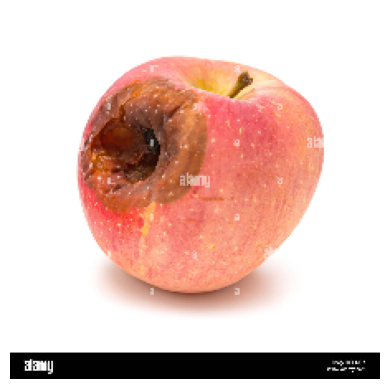

Predicted class: rottenapples
Confidence: 99.92%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo entrenado desde el archivo `.h5`
model = tf.keras.models.load_model('fruit_classifier_model.h5')

# Definir la ruta de la imagen que quieres probar
img_path = '/content/manzana-podrida-con-un-gran-agujero-sobre-fondo-blanco-jhy6ea.jpg'  # Reemplaza con la ruta de tu imagen

# Parámetros de la imagen
img_height, img_width = 224, 224

# Cargar y preprocesar la imagen
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch (1, img_height, img_width, 3)
img_array /= 255.0  # Normalizar la imagen

# Realizar la predicción
predictions = model.predict(img_array)

# Interpretar los resultados
# Asumiendo que el generador de datos usó el mismo orden de clases durante el entrenamiento
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

predicted_class_idx = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_idx]
confidence = predictions[0][predicted_class_idx]

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.show()

# Mostrar la etiqueta predicha y el porcentaje de confianza
print(f'Predicted class: {predicted_class_name}')
print(f'Confidence: {confidence:.2%}')
